In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keras.layers import (Activation, Conv3D, Dense, Dropout, Flatten,MaxPooling3D)
from keras.models import Sequential
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns
from PIL import Image



C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
I = plt.imread(r'Images/study_area_edited_paper.png')
#plt.imshow(I)

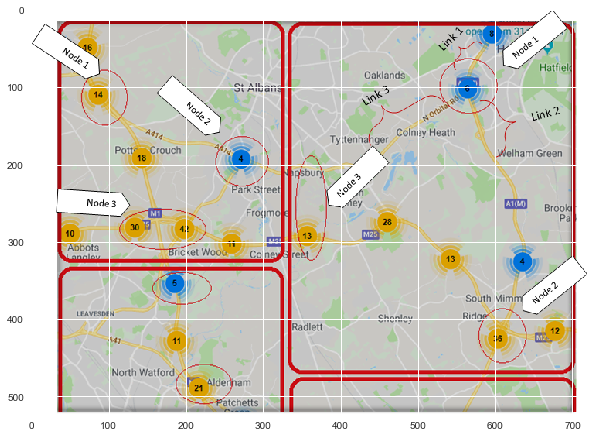

In [3]:
plt.figure(figsize=(10,8))
plt.imshow(I)

# Patch 1

In [4]:
path=r"I:\personal\Laptop G\G laptop folder\My Projects\Jupyter\PhD Implemntation\15 min tabular\P1\N2\L1\in"
os.chdir(path)

In [5]:
print(os.getcwd())

I:\personal\Laptop G\G laptop folder\My Projects\Jupyter\PhD Implemntation\15 min tabular\P1\N2\L1\in


# N2-> L1-in

In [6]:
N2_L1_in_1 =pd.read_csv("in(521226;207291).csv",header=0,index_col=0,infer_datetime_format=True)
N2_L1_in_2 =pd.read_csv("out(521479;208340).csv",header=0,index_col=0,infer_datetime_format=True)



In [7]:

### missing value imputation using back fill propogation calculated columnwise

'''fill_NaN = Imputer(missing_values=np.nan, strategy='mean', axis=0,verbose=1)
imputed_N1_L1_in = pd.DataFrame(fill_NaN.fit_transform(N1_L1_in))
imputed_N1_L1_in.columns = N1_L1_in.columns
imputed_N1_L1_in.index = N1_L1_in.index

fill_NaN1 = Imputer(missing_values=np.nan, strategy='mean', axis=0,verbose=1)
imputed_N1_L1_out = pd.DataFrame(fill_NaN1.fit_transform(N1_L1_out))
imputed_N1_L1_out.columns = N1_L1_out.columns
imputed_N1_L1_out.index = N1_L1_out.index'''

N2_L1_in_1.fillna(method='bfill',axis=0,inplace=True)
N2_L1_in_2.fillna(method='bfill',axis=0,inplace=True)


In [8]:
N2_L1_in_1

,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,...,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45,Total
Report Date,,,,,,,,,,,,,,,,,,,,,
Wed 01 Apr 2015,22.0,22.0,16.0,17.0,16.0,10.0,23.0,13.0,6.0,14.0,...,49.0,47.0,55.0,36.0,40.0,42.0,23.0,43.0,32.0,7093.0
Thu 02 Apr 2015,25.0,18.0,30.0,20.0,15.0,11.0,8.0,5.0,19.0,14.0,...,54.0,59.0,55.0,46.0,38.0,42.0,27.0,47.0,34.0,7120.0
Fri 03 Apr 2015,19.0,25.0,13.0,21.0,16.0,16.0,20.0,13.0,10.0,14.0,...,49.0,42.0,36.0,44.0,41.0,40.0,33.0,35.0,33.0,4876.0
Sat 04 Apr 2015,8.0,22.0,25.0,21.0,21.0,4.0,16.0,10.0,13.0,13.0,...,41.0,35.0,36.0,45.0,40.0,33.0,28.0,26.0,21.0,4444.0
Sun 05 Apr 2015,14.0,21.0,24.0,13.0,24.0,14.0,11.0,9.0,4.0,11.0,...,46.0,35.0,31.0,32.0,38.0,38.0,49.0,34.0,35.0,3096.0
Mon 06 Apr 2015,26.0,45.0,31.0,30.0,27.0,17.0,12.0,19.0,13.0,13.0,...,39.0,32.0,50.0,44.0,34.0,39.0,22.0,25.0,24.0,4451.0
Tue 07 Apr 2015,20.0,18.0,17.0,22.0,9.0,11.0,16.0,13.0,4.0,10.0,...,39.0,48.0,51.0,44.0,41.0,32.0,23.0,25.0,25.0,6293.0
Wed 08 Apr 2015,17.0,19.0,25.0,15.0,13.0,10.0,14.0,12.0,7.0,8.0,...,44.0,50.0,49.0,32.0,39.0,29.0,23.0,35.0,29.0,6481.0
Thu 09 Apr 2015,11.0,15.0,12.0,16.0,11.0,10.0,9.0,23.0,18.0,13.0,...,39.0,48.0,37.0,53.0,35.0,18.0,29.0,28.0,31.0,6457.0


In [9]:
N2_L1_in_2

,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,...,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45,Total
Report Date,,,,,,,,,,,,,,,,,,,,,
Wed 01 Apr 2015,109.0,79.0,80.0,69.0,47.0,34.0,54.0,43.0,32.0,37.0,...,297.0,289.0,262.0,248.0,200.0,183.0,149.0,150.0,134.0,50379
Thu 02 Apr 2015,109.0,79.0,80.0,69.0,68.0,39.0,57.0,48.0,53.0,35.0,...,379.0,325.0,311.0,248.0,265.0,220.0,189.0,200.0,169.0,53880
Fri 03 Apr 2015,143.0,123.0,108.0,90.0,67.0,69.0,69.0,58.0,46.0,51.0,...,228.0,221.0,242.0,205.0,164.0,180.0,174.0,137.0,147.0,35314
Sat 04 Apr 2015,123.0,105.0,89.0,81.0,65.0,77.0,69.0,53.0,36.0,38.0,...,226.0,247.0,215.0,206.0,219.0,197.0,229.0,189.0,159.0,33579
Sun 05 Apr 2015,170.0,146.0,103.0,111.0,82.0,70.0,61.0,54.0,62.0,50.0,...,316.0,290.0,246.0,224.0,196.0,202.0,186.0,164.0,143.0,31829
Mon 06 Apr 2015,102.0,120.0,105.0,75.0,71.0,62.0,51.0,48.0,31.0,34.0,...,291.0,235.0,232.0,198.0,207.0,210.0,162.0,152.0,120.0,32599
Tue 07 Apr 2015,82.0,82.0,63.0,57.0,46.0,40.0,40.0,32.0,26.0,27.0,...,267.0,260.0,261.0,214.0,169.0,164.0,153.0,0.0,0.0,47754
Wed 08 Apr 2015,88.0,88.0,85.0,45.0,50.0,41.0,53.0,42.0,33.0,51.0,...,284.0,299.0,252.0,224.0,201.0,213.0,177.0,155.0,127.0,43511
Thu 09 Apr 2015,127.0,98.0,97.0,77.0,50.0,37.0,54.0,57.0,51.0,42.0,...,319.0,260.0,293.0,227.0,228.0,190.0,192.0,170.0,114.0,50708


In [10]:
#N2_L1_in_1.index =pd.to_datetime(N2_L1_in_1.index,format='%A %d %b %Y')
#N2_L1_in_2.index =pd.to_datetime(N2_L1_in_2.index)

In [11]:
#N2_L1_in_2.reindex(N2_L1_in_1.index)

#Net L1 Inflow

In [12]:
## subtracting the N2_L1_in_1 from N2_L1_in_2 and retaing the N2_L1_in_2 as missing or nan values with
## absolute value
#N2_L1_in_net=N2_L1_in_2.subtract(N2_L1_in_1)
N2_L1_in_net=np.abs(N2_L1_in_2.subtract(N2_L1_in_1))


In [13]:
N2_L1_in_net.index=pd.to_datetime(N2_L1_in_net.index)

In [14]:
N2_L1_in_net.reset_index(inplace=True)

In [15]:
N2_L1_in_net.sort_values(['Report Date'],inplace=True)

In [16]:
N2_L1_in_net.set_index('Report Date',inplace=True)

In [17]:
N2_L1_in_net

,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,...,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45,Total
Report Date,,,,,,,,,,,,,,,,,,,,,
2015-04-01,87.0,57.0,64.0,52.0,31.0,24.0,31.0,30.0,26.0,23.0,...,248.0,242.0,207.0,212.0,160.0,141.0,126.0,107.0,102.0,43286.0
2015-04-02,84.0,61.0,50.0,49.0,53.0,28.0,49.0,43.0,34.0,21.0,...,325.0,266.0,256.0,202.0,227.0,178.0,162.0,153.0,135.0,46760.0
2015-04-03,124.0,98.0,95.0,69.0,51.0,53.0,49.0,45.0,36.0,37.0,...,179.0,179.0,206.0,161.0,123.0,140.0,141.0,102.0,114.0,30438.0
2015-04-04,115.0,83.0,64.0,60.0,44.0,73.0,53.0,43.0,23.0,25.0,...,185.0,212.0,179.0,161.0,179.0,164.0,201.0,163.0,138.0,29135.0
2015-04-05,156.0,125.0,79.0,98.0,58.0,56.0,50.0,45.0,58.0,39.0,...,270.0,255.0,215.0,192.0,158.0,164.0,137.0,130.0,108.0,28733.0
2015-04-06,76.0,75.0,74.0,45.0,44.0,45.0,39.0,29.0,18.0,21.0,...,252.0,203.0,182.0,154.0,173.0,171.0,140.0,127.0,96.0,28148.0
2015-04-07,62.0,64.0,46.0,35.0,37.0,29.0,24.0,19.0,22.0,17.0,...,228.0,212.0,210.0,170.0,128.0,132.0,130.0,25.0,25.0,41461.0
2015-04-08,71.0,69.0,60.0,30.0,37.0,31.0,39.0,30.0,26.0,43.0,...,240.0,249.0,203.0,192.0,162.0,184.0,154.0,120.0,98.0,37030.0
2015-04-09,116.0,83.0,85.0,61.0,39.0,27.0,45.0,34.0,33.0,29.0,...,280.0,212.0,256.0,174.0,193.0,172.0,163.0,142.0,83.0,44251.0


#Normalising For Maximum Column (interval in a day)  value

In [18]:
N2_L1_in_net=(N2_L1_in_net.astype('float32')) / (np.max(N2_L1_in_net.astype('float32')))

In [19]:
L1_in_img_net = Image.fromarray(N2_L1_in_net.T.values.astype('float32'),'L')

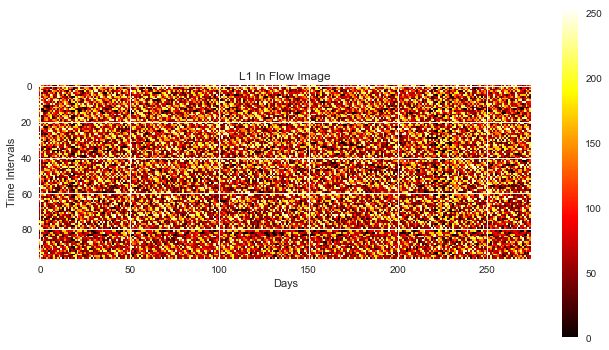

In [20]:
fig = plt.figure(figsize=(18,10))

plt.subplot(221)
plt.tight_layout()
plt.title('L1 In Flow Image') 
plt.imshow(L1_in_img_net, cmap='hot',interpolation='none')
L1_in_img_net.save('inflow-1.png')
plt.colorbar()
plt.xlabel('Days')
plt.ylabel('Time Intervals')

# N2-> L2-out

In [21]:
path=r"I:\personal\Laptop G\G laptop folder\My Projects\Jupyter\PhD Implemntation\15 min tabular\P1\N2\L2\out"
os.chdir(path)

In [22]:
print(os.getcwd())

I:\personal\Laptop G\G laptop folder\My Projects\Jupyter\PhD Implemntation\15 min tabular\P1\N2\L2\out


In [23]:
N2_L2_out_net =pd.read_csv("out(521479;208340).csv",header=0,index_col=0)




In [24]:

### missing value imputation using back fill propogation calculated columnwise

'''fill_NaN = Imputer(missing_values=np.nan, strategy='mean', axis=0,verbose=1)
imputed_N1_L1_in = pd.DataFrame(fill_NaN.fit_transform(N1_L1_in))
imputed_N1_L1_in.columns = N1_L1_in.columns
imputed_N1_L1_in.index = N1_L1_in.index

fill_NaN1 = Imputer(missing_values=np.nan, strategy='mean', axis=0,verbose=1)
imputed_N1_L1_out = pd.DataFrame(fill_NaN1.fit_transform(N1_L1_out))
imputed_N1_L1_out.columns = N1_L1_out.columns
imputed_N1_L1_out.index = N1_L1_out.index'''

N2_L2_out_net.fillna(method='bfill',axis=0,inplace=True)



In [25]:
N2_L2_out_net.index=pd.to_datetime(N2_L2_out_net.index)

In [26]:
N2_L2_out_net.reset_index(inplace=True)

In [27]:
N2_L2_out_net.sort_values(['Report Date'],inplace=True)

In [28]:
N2_L2_out_net.set_index('Report Date',inplace=True)

In [29]:
N2_L2_out_net

,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,...,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45,Total
Report Date,,,,,,,,,,,,,,,,,,,,,
2015-04-01,109.0,79.0,80.0,69.0,47.0,34.0,54.0,43.0,32.0,37.0,...,297.0,289.0,262.0,248.0,200.0,183.0,149.0,150.0,134.0,50379
2015-04-02,109.0,79.0,80.0,69.0,68.0,39.0,57.0,48.0,53.0,35.0,...,379.0,325.0,311.0,248.0,265.0,220.0,189.0,200.0,169.0,53880
2015-04-03,143.0,123.0,108.0,90.0,67.0,69.0,69.0,58.0,46.0,51.0,...,228.0,221.0,242.0,205.0,164.0,180.0,174.0,137.0,147.0,35314
2015-04-04,123.0,105.0,89.0,81.0,65.0,77.0,69.0,53.0,36.0,38.0,...,226.0,247.0,215.0,206.0,219.0,197.0,229.0,189.0,159.0,33579
2015-04-05,170.0,146.0,103.0,111.0,82.0,70.0,61.0,54.0,62.0,50.0,...,316.0,290.0,246.0,224.0,196.0,202.0,186.0,164.0,143.0,31829
2015-04-06,102.0,120.0,105.0,75.0,71.0,62.0,51.0,48.0,31.0,34.0,...,291.0,235.0,232.0,198.0,207.0,210.0,162.0,152.0,120.0,32599
2015-04-07,82.0,82.0,63.0,57.0,46.0,40.0,40.0,32.0,26.0,27.0,...,267.0,260.0,261.0,214.0,169.0,164.0,153.0,0.0,0.0,47754
2015-04-08,88.0,88.0,85.0,45.0,50.0,41.0,53.0,42.0,33.0,51.0,...,284.0,299.0,252.0,224.0,201.0,213.0,177.0,155.0,127.0,43511
2015-04-09,127.0,98.0,97.0,77.0,50.0,37.0,54.0,57.0,51.0,42.0,...,319.0,260.0,293.0,227.0,228.0,190.0,192.0,170.0,114.0,50708


#Normalising For Maximum Column (interval in a day)  value

In [30]:
N2_L2_out_net=(N2_L2_out_net.astype('float32')) / (np.max(N2_L2_out_net.astype('float32')))


#reindexing to bring all on the standard

In [31]:
#N2_L2_out_net.reindex(N2_L1_in_2.index)

#Net L2 out flow image

In [32]:
L2_out_img_net = Image.fromarray(N2_L2_out_net.T.values.astype('float32'),'L')

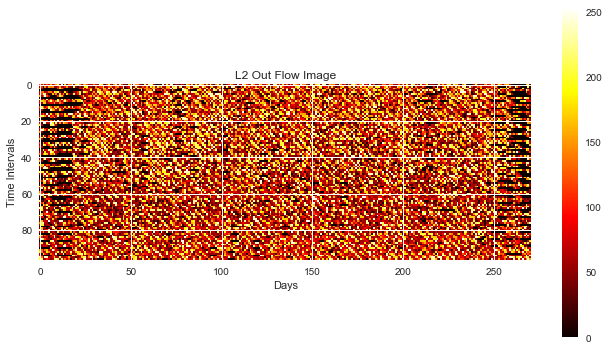

In [33]:
fig = plt.figure(figsize=(18,10))

plt.subplot(221)
plt.tight_layout()
plt.title('L2 Out Flow Image') 
plt.imshow(L2_out_img_net, cmap='hot',interpolation='none')
L2_out_img_net.save('L2-outflow.png')
plt.colorbar()
plt.xlabel('Days')
plt.ylabel('Time Intervals')

# N2-> L3-out

In [34]:
path=r"I:\personal\Laptop G\G laptop folder\My Projects\Jupyter\PhD Implemntation\15 min tabular\P1\N2\L3"
os.chdir(path)

In [35]:
print(os.getcwd())

I:\personal\Laptop G\G laptop folder\My Projects\Jupyter\PhD Implemntation\15 min tabular\P1\N2\L3


In [36]:
N2_L3_out_net =pd.read_csv("out(521448;206730).csv",header=0,index_col=0)




In [37]:

### missing value imputation using back fill propogation calculated columnwise

'''fill_NaN = Imputer(missing_values=np.nan, strategy='mean', axis=0,verbose=1)
imputed_N1_L1_in = pd.DataFrame(fill_NaN.fit_transform(N1_L1_in))
imputed_N1_L1_in.columns = N1_L1_in.columns
imputed_N1_L1_in.index = N1_L1_in.index

fill_NaN1 = Imputer(missing_values=np.nan, strategy='mean', axis=0,verbose=1)
imputed_N1_L1_out = pd.DataFrame(fill_NaN1.fit_transform(N1_L1_out))
imputed_N1_L1_out.columns = N1_L1_out.columns
imputed_N1_L1_out.index = N1_L1_out.index'''

N2_L3_out_net.fillna(method='bfill',axis=0,inplace=True)



In [38]:
N2_L3_out_net.index=pd.to_datetime(N2_L3_out_net.index)

In [39]:
N2_L3_out_net.reset_index(inplace=True)

In [40]:
N2_L3_out_net.sort_values(['Report Date'],inplace=True)

In [41]:
N2_L3_out_net.set_index('Report Date',inplace=True)

In [42]:
N2_L3_out_net

,00:00,00:15,00:30,00:45,01:00,01:15,01:30,01:45,02:00,02:15,...,21:45,22:00,22:15,22:30,22:45,23:00,23:15,23:30,23:45,Total
Report Date,,,,,,,,,,,,,,,,,,,,,
2015-04-01,80.0,68.0,58.0,57.0,45.0,31.0,57.0,37.0,27.0,38.0,...,215.0,204.0,194.0,171.0,149.0,166.0,114.0,136.0,121.0,36641
2015-04-02,91.0,68.0,71.0,63.0,58.0,31.0,49.0,29.0,48.0,33.0,...,269.0,274.0,220.0,203.0,197.0,171.0,149.0,170.0,131.0,39048
2015-04-03,103.0,102.0,78.0,69.0,60.0,54.0,54.0,44.0,39.0,31.0,...,182.0,184.0,167.0,159.0,134.0,156.0,136.0,121.0,125.0,25457
2015-04-04,83.0,76.0,83.0,69.0,60.0,43.0,57.0,48.0,33.0,36.0,...,177.0,189.0,153.0,182.0,175.0,136.0,170.0,144.0,116.0,24054
2015-04-05,118.0,109.0,88.0,89.0,71.0,56.0,54.0,40.0,37.0,44.0,...,245.0,199.0,182.0,159.0,143.0,164.0,163.0,131.0,129.0,22202
2015-04-06,100.0,115.0,92.0,72.0,66.0,58.0,42.0,39.0,28.0,26.0,...,198.0,170.0,172.0,145.0,149.0,156.0,133.0,104.0,95.0,22951
2015-04-07,63.0,76.0,60.0,45.0,42.0,38.0,38.0,27.0,19.0,27.0,...,197.0,191.0,199.0,170.0,135.0,131.0,133.0,102.0,104.0,34504
2015-04-08,64.0,75.0,85.0,38.0,40.0,38.0,46.0,33.0,32.0,38.0,...,200.0,211.0,205.0,168.0,172.0,164.0,128.0,137.0,107.0,35273
2015-04-09,89.0,77.0,72.0,58.0,40.0,37.0,37.0,57.0,39.0,43.0,...,222.0,204.0,179.0,189.0,167.0,141.0,141.0,118.0,92.0,36298


#Normalising For Maximum Column (interval in a day)  value

In [43]:
N2_L3_out_net=(N2_L3_out_net.astype('float32')) / (np.max(N2_L3_out_net.astype('float32')))


#reindexing to bring all on the standard

In [44]:
#N2_L3_out_net.reindex(N2_L1_in_net.index)

 #Net L3 out flow image

In [45]:
 L3_out_img_net= Image.fromarray(N2_L3_out_net.T.values.astype('float32'),'L')

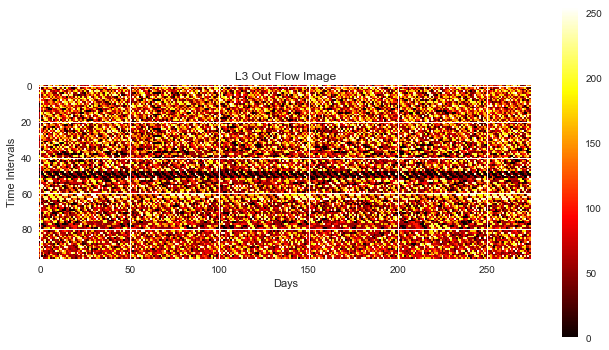

In [46]:
fig = plt.figure(figsize=(18,10))

plt.subplot(221)
plt.tight_layout()
plt.title('L3 Out Flow Image') 
plt.imshow(L3_out_img_net, cmap='hot',interpolation='none')
L3_out_img_net.save('L3-outflow.png')
plt.colorbar()
plt.xlabel('Days')
plt.ylabel('Time Intervals')

# Preparing The Training Images 

#making matrics for each time of each day.
#row[0] -> L1-inflow,L2outflow,L3-outflow
#row[1] -> L1-inflow distance from the coming node,L2-outflow to the outgoing node,L3-outflow to the outgoing node.
imageshape= 3 x 3


In [66]:
# finding mean with respect to the day of the week

N2_L1_in_net_filtered=N2_L1_in_net.filter(items=['00:00','02:00','04:00','06:00','08:00','10:00','12:00','14:00','16:00','18:00','20:00','22:00'])
N2_L2_out_net_filtered=N2_L2_out_net.filter(items=['00:00','02:00','04:00','06:00','08:00','10:00','12:00','14:00','16:00','18:00','20:00','22:00'])
N2_L3_out_net_filtered=N2_L3_out_net.filter(items=['00:00','02:00','04:00','06:00','08:00','10:00','12:00','14:00','16:00','18:00','20:00','22:00'])

#finding the common index dates

In [67]:


time_list=['00:00','02:00','04:00','06:00','08:00','10:00','12:00','14:00','16:00','18:00','20:00','22:00']
#common_dates=N2_L1_in_net_filtered.index.intersection(N2_L2_out_net_filtered.index)
common_dates=np.unique(N2_L2_out_net_filtered.index)
    

In [70]:
np.shape(common_dates)

(271,)

 filtering for the common index dates in all the frames


In [68]:
N2_L1_in_net_filtered=N2_L1_in_net_filtered.filter(items=common_dates,axis=0)
#N2_L3_out_net_filtered=N2_L3_out_net_filtered[N2_L3_out_net_filtered.index==common_dates]

In [71]:
N2_L2_out_net_filtered=N2_L2_out_net_filtered.filter(items=common_dates,axis=0)
#N2_L3_out_net_filtered=N2_L3_out_net_filtered[N2_L3_out_net_filtered.index==common_dates]

In [72]:
N2_L3_out_net_filtered=N2_L3_out_net_filtered.filter(items=common_dates,axis=0)
#N2_L3_out_net_filtered=N2_L3_out_net_filtered[N2_L3_out_net_filtered.index==common_dates]

In [78]:
np.shape(N2_L1_in_net_filtered)

(271, 12)

In [79]:
np.shape(N2_L2_out_net_filtered)

(271, 12)

In [80]:
np.shape(N2_L3_out_net_filtered)

(271, 12)

In [110]:
a=[]
time=[]
dates=[]

for i,j in enumerate(common_dates):
    for k in time_list:
        a.append(np.stack((N2_L1_in_net_filtered.filter(items=common_dates,axis=0)[k][0],
                            N2_L2_out_net_filtered.filter(items=common_dates,axis=0)[k][0],
                          N2_L3_out_net_filtered.filter(items=common_dates,axis=0)[k][0])))
        time.append(k)
        dates.append(j)
        #a.append(np.stack((b,N2_L3_out_net_filtered.filter(items=common_dates,axis=0)[k][0])))
                          

In [111]:
N2_L3_out_net_filtered.filter(items=common_dates,axis=0)['00:00'][0]

0.26936027

In [117]:
N2_L3_out_net_filtered.head()

,00:00,02:00,04:00,06:00,08:00,10:00,12:00,14:00,16:00,18:00,20:00,22:00
Report Date,,,,,,,,,,,,
2015-04-01,0.269360,0.306818,0.602564,0.695238,0.932961,0.797732,0.696124,0.683313,0.890084,0.834701,0.679764,0.703448
2015-04-02,0.306397,0.545455,0.628205,0.580952,0.865922,0.784499,0.858915,0.785627,0.935484,0.920281,0.864440,0.944828
2015-04-03,0.346801,0.443182,0.512821,0.409524,0.235754,0.680529,0.809302,0.640682,0.522103,0.543962,0.522593,0.634483
2015-04-04,0.279461,0.375000,0.551282,0.280952,0.200000,0.742911,0.807752,0.459196,0.507766,0.447831,0.465619,0.651724
2015-04-05,0.397306,0.420455,0.307692,0.166667,0.103911,0.587902,0.775194,0.460414,0.420550,0.424385,0.669941,0.686207


In [115]:
print(np.shape(a),np.shape(dates),np.shape(time))

(3252, 3) (3252,) (3252,)


Storing the prepared filtered and sorted input data for ML

In [120]:
import pickle

In [121]:
path=r"I:\personal\Laptop G\G laptop folder\My Projects\Jupyter\PhD Implemntation\Final Pre-processed Data"
os.chdir(path)

In [122]:
print(os.getcwd())

I:\personal\Laptop G\G laptop folder\My Projects\Jupyter\PhD Implemntation\Final Pre-processed Data


In [123]:
with open('filtered_data(L1in,L2out,L3out).pickle', 'wb') as handle1:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('filtered_data(dates).pickle', 'wb') as handle1:
    pickle.dump(dates, handle1, protocol=pickle.HIGHEST_PROTOCOL) 
    
with open('filtered_data(dates).pickle', 'wb') as handle2:
    pickle.dump(dates, handle1, protocol=pickle.HIGHEST_PROTOCOL)

In [124]:
with open('filtered_data(L1in,L2out,L3out).pickle', 'rb') as handle1:
    b = pickle.load(handle1)

In [126]:
np.shape(b)

(3252, 3)